In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Column Type
1. **Numerical** - Age,Fare,PassengerId
2. **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
3. **Mixed** - Name, Ticket, Cabin

## Missing values

In [4]:
# Missing values in our data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Percentage of the data missing
(df.isnull().sum()/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Datatype of the column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### <U> COLUMN 1  </U>: AGE (Conclusion)
1. Age is normally (almost) distributed
2. 20% of the values are missing
3. There are some outliers


In [7]:
# Descriptive Analysis:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

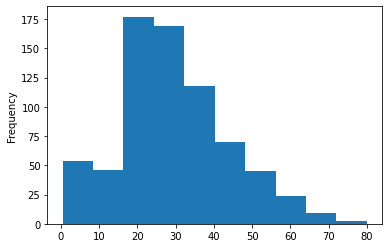

In [8]:
# Visualizations: plot some graphs which gives us some additional information about this column
df["Age"].plot(kind="hist",bins=10)

<AxesSubplot:ylabel='Density'>

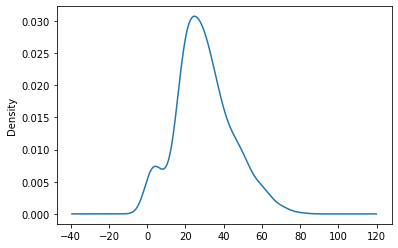

In [9]:
# KDE (Kernel Density Estimation) : This graph will show the distribution of the data
df['Age'].plot(kind='kde')
# not perfectly normal but can be roughly treated as normal distribution

In [10]:
"""SKEWNESS CALCULATION
If skew = 0: normal distribution
If skew -0.5 to 0.5: almost symmetric
If skew -1 to 1: moderately symmetric
If skew -1.5 to 1.5: highly asymmetric
"""
df["Age"].skew()
# we can consider this data as almost normal distribution

0.38910778230082704

<AxesSubplot:>

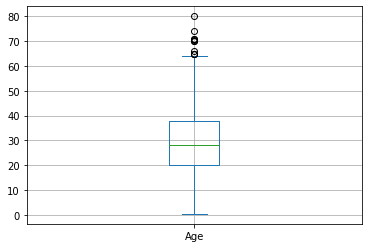

In [11]:
# Identify outliers
df["Age"].plot(kind="box",grid="True")

In [12]:
# check the outliers: should make a part of our data or not
df[df["Age"]>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [13]:
(df["Age"].isnull().sum()/len(df["Age"]))*100

19.865319865319865

### <U> COLUMN 2  </U>: FARE (Conclusion)
1. Data is highly (positively) skewed
2. Fare column actually contains the group fare and not the individual fare (This might be an issue)
3. We need to create a new coulmn called individual fare

In [14]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:ylabel='Frequency'>

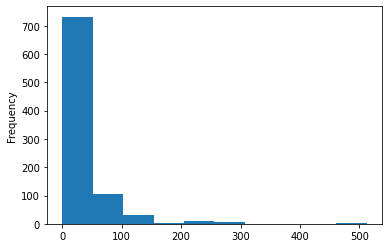

In [15]:
df["Fare"].plot(kind="hist")

<AxesSubplot:ylabel='Density'>

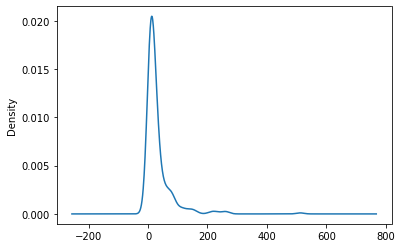

In [16]:
df["Fare"].plot(kind="kde")

In [17]:
df["Fare"].skew()

4.787316519674893

<AxesSubplot:>

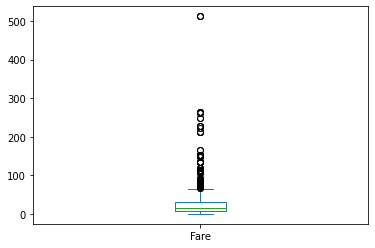

In [18]:
df["Fare"].plot(kind="box")

In [19]:
# just to see whats inside the data
df[df["Fare"]>300]
# conclusion: Fare = Total fare of a family not per person 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


### <U> COLUMN 3  </U>: SURVIVED (Conclusion)

In [20]:
# Frequency distribution
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

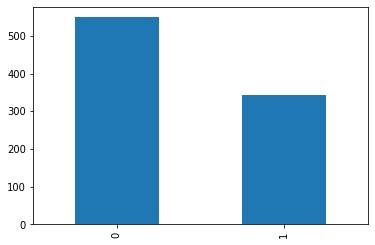

In [21]:
df["Survived"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Survived'>

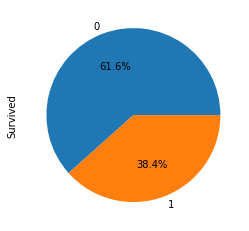

In [22]:
df["Survived"].value_counts().plot(kind="pie",autopct="%0.1f%%")
# conclusion: the accident was very deadly as more than 50% of the passangers coudnt survive

In [23]:
df["Pclass"].value_counts()
# doubt : surprisingly more people travelled in pclass1 and less people travelled in pclass2 

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

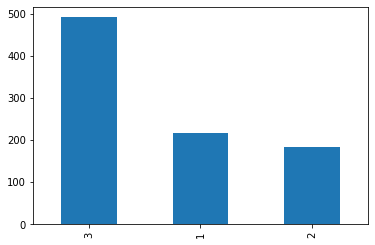

In [24]:
df["Pclass"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Pclass'>

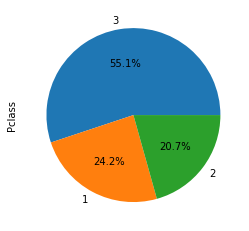

In [25]:
df["Pclass"].value_counts().plot(kind="pie",autopct="%0.1f%%")

In [26]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

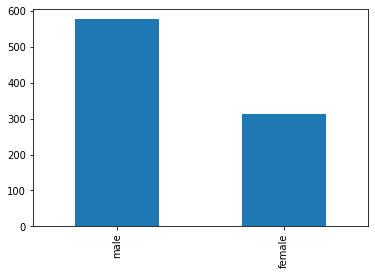

In [27]:
df["Sex"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Sex'>

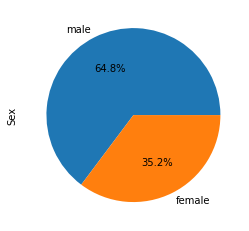

In [28]:
df["Sex"].value_counts().plot(kind="pie",autopct="%0.1f%%")

In [29]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:>

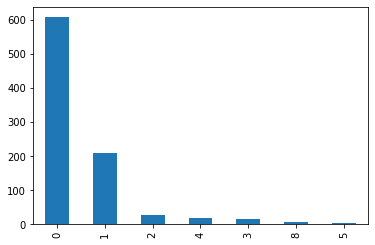

In [30]:
df["SibSp"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='SibSp'>

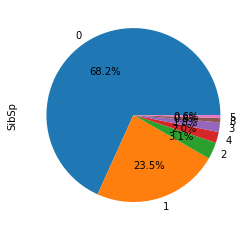

In [31]:
df["SibSp"].value_counts().plot(kind="pie",autopct="%0.1f%%")

### CONCLUSION : 
1. Parentchild and sibling clumns can be merged to form a new column call family_size
2. Create new column called is_alone

In [32]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Conclusion mixed column
Need to feature engineer the mixed column to get more insights


# Bivariate Analysis



In [33]:
# Relationship between "Survived" and "Pclass" we need to create contigency table
(pd.crosstab(df["Survived"],df["Pclass"],normalize="columns"))*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


conclusion: safe class is Pclass 1 > Pclass2 > Pclass3,
2. Plclass 3  is risky

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

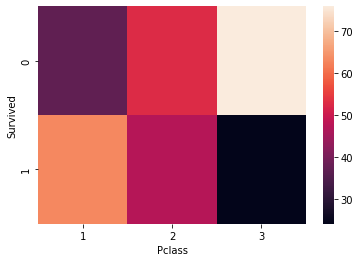

In [34]:
sns.heatmap((pd.crosstab(df["Survived"],df["Pclass"],normalize="columns"))*100)

In [35]:
pd.crosstab(df["Survived"],df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [36]:
(pd.crosstab(df["Survived"],df["Sex"],normalize="columns"))*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [37]:
(pd.crosstab(df["Survived"],df["Embarked"],normalize="columns"))*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


### CONCLUSION
- C = 44.6% PEOPLE DIED AND 55.4% PEOPLE SURVIVED 
- Q = 61.1% PEOPLE DIED AND 38.9% PEOPLE SURVIVED 
- S = 66.3% PEOPLE DIED AND 33.7% PEOPLE SURVIVED 
This is very high in comparision to Q and S
Reasons:
1. It is possible that C station has more number of Pclass 1 passangers
2. May be females are more.
Because the we know that survived passangers are mostly females or Pclass 1 passangers
#### TO CHECK OR VALIDATE OUR CONCLUSION OR ASSUMPTION - 

In [38]:
(pd.crosstab(df["Sex"],df["Embarked"],normalize="columns"))*100
# C = 43% female ,57% male ;  assumption is wrong

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [39]:
(pd.crosstab(df["Pclass"],df["Embarked"],normalize="columns"))*100
# C : highest percentage of Pclass 1, so this is the reason why C station's people survive more than other two stations
# Derivative conclusion: C STATION people are much safer because they booked Pclass 1 and Pclass 1 is more safer than other 

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


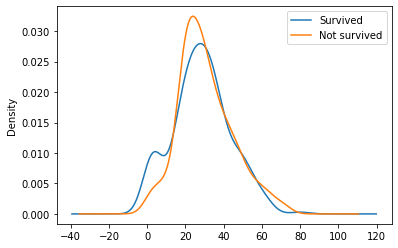

In [40]:
# Relationship between Survived and age (Age k hisab se survival k chances kaise bdh rahe hai or ghat rahe hai)
df[df["Survived"] == 1]["Age"].plot(kind="kde", label ="Survived")
df[df["Survived"] == 0]["Age"].plot(kind="kde", label ="Not survived")
plt.legend()
plt.show()


In [41]:
df[df["Pclass"] == 1]["Age"].mean() 
# mean = most of the people pclass1 comes under this age group  

38.233440860215055

## FEATURE ENGINEERING

 How can we create a column which give per person fare

In [42]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [43]:
df_test = pd.read_csv("test.csv")

In [44]:
df3 = pd.concat([df,df_test])
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [45]:
df3[df3["Ticket"] == "CA. 2343"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [46]:
df3["Ticket"].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [47]:
# We can create an new column by dividing the fare 
df3["Individual_fare"] = df["Fare"]/(df["SibSp"] + df["Parch"] + 1)

<AxesSubplot:>

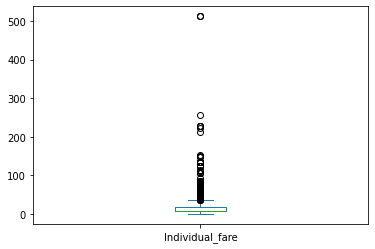

In [48]:
df3["Individual_fare"].plot(kind="box")

In [49]:
df3[["Individual_fare","Fare"]].describe()

,Individual_fare,Fare
count,1309.000000,1308.000000
mean,19.818163,33.295479
std,35.515136,51.758668
min,0.000000,0.000000
25%,7.250000,7.895800
50%,8.050000,14.454200
75%,18.787500,31.275000
max,512.329200,512.329200


In [50]:
df3[df3["Individual_fare"] == 512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,512.3292
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,512.3292
258,1150,NaN,2,"Bentham, Miss. Lilian W",female,19.0,0,0,28404,13.0000,NaN,S,512.3292


In [51]:
df3["Family_size"]= df3["SibSp"] + df3["Parch"] +1

In [52]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.000000,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,7.925000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,8.050000,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,10.833333,1


In [53]:
#I will create an new feature or column called family_type
# 0 = alone
# 2 - 4 = small family
# more than 5 = large family

def transformation_family_size (num):
    
    if num == 1:
        return "alone"
    elif num > 1 and num < 4:
        return "small"
    else:
        return "large"

In [54]:
df3["Family_type"] = df3["Family_size"].apply(transformation_family_size)

In [55]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.000000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,7.925000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,8.050000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,10.833333,1,alone


In [56]:
# Bivariate analysis
pd.crosstab(df3["Survived"],df3["Family_type"],normalize = "columns")*100

Family_type,alone,large,small
Survived,,,
0.0,69.646182,65.934066,43.726236
1.0,30.353818,34.065934,56.273764


In [73]:
df3.corr() # correlation will give you relation between each column with all the other column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Individual_fare,Family_size
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428,0.018124,-0.031437
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.221600,0.016639
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.327918,0.050027
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,0.100353,-0.240229
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.086705,0.861952
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,-0.053947,0.792296
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,0.543910,0.226492
Individual_fare,0.018124,0.221600,-0.327918,0.100353,-0.086705,-0.053947,0.543910,1.000000,-0.086517
Family_size,-0.031437,0.016639,0.050027,-0.240229,0.861952,0.792296,0.226492,-0.086517,1.000000


In [75]:
df3.corr()["Survived"]

PassengerId       -0.005007
Survived           1.000000
Pclass            -0.338481
Age               -0.077221
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
Individual_fare    0.221600
Family_size        0.016639
Name: Survived, dtype: float64

<AxesSubplot:>

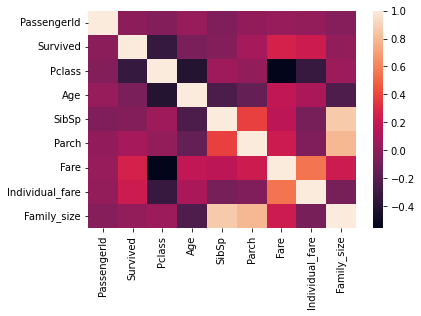

In [76]:
sns.heatmap(df3.corr()) # if two columns are highly correlated with each other so we can't use both of them for prediction we can use only one

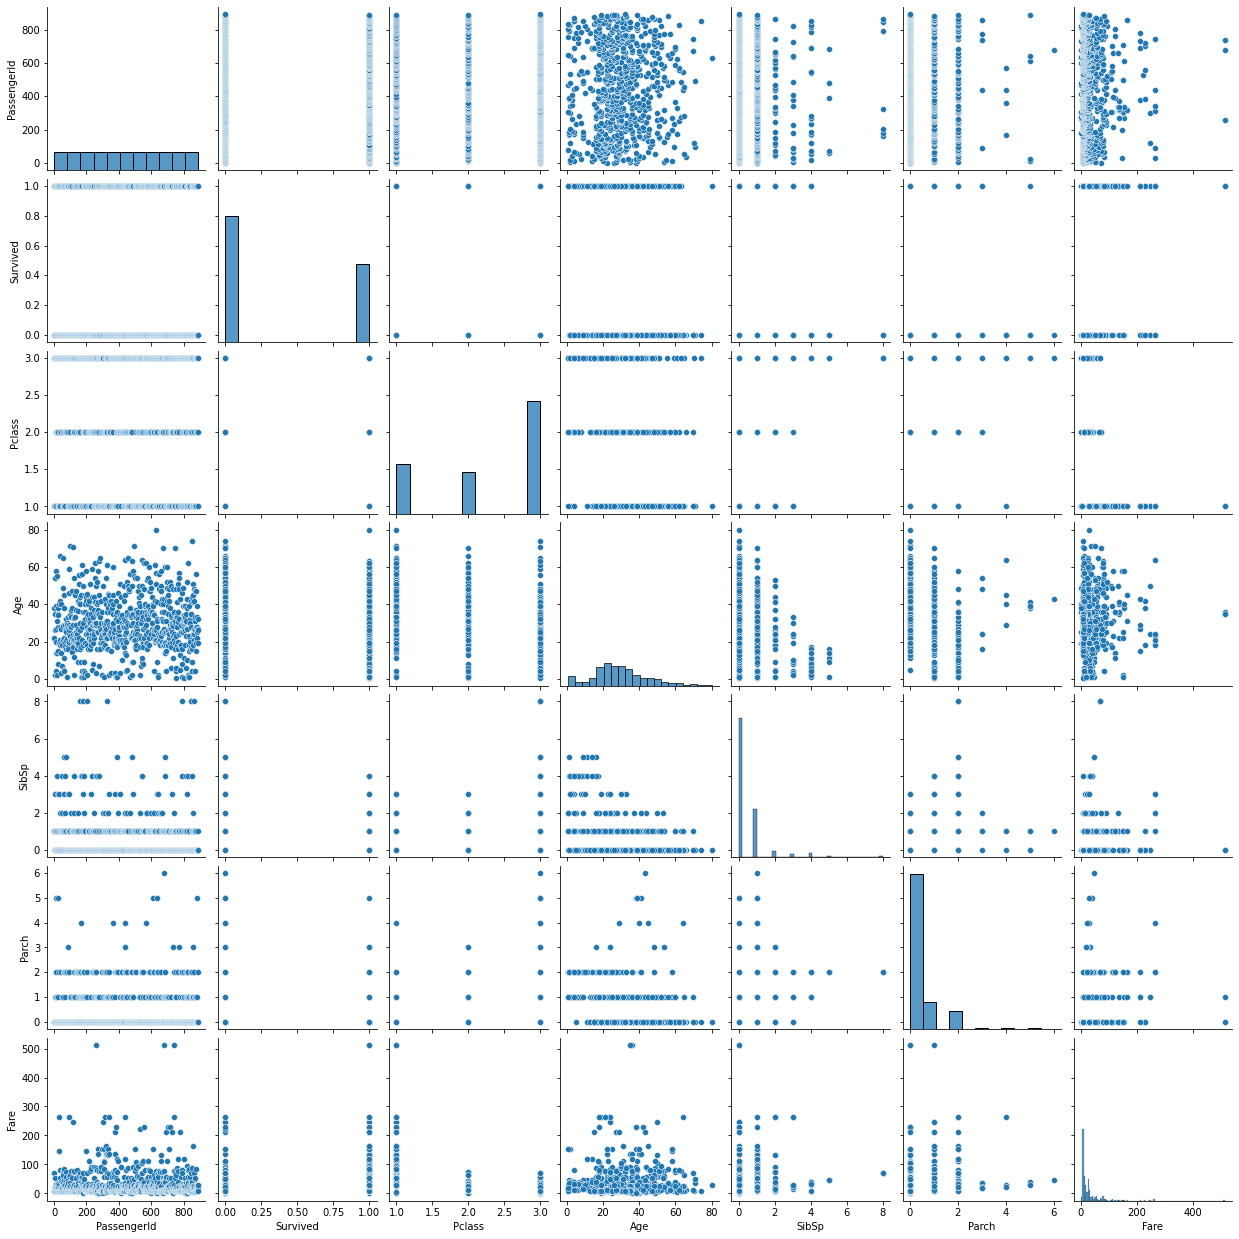

In [78]:
sns.pairplot(df)